<a href="https://colab.research.google.com/github/CaitlynRepo/Data-Analysis/blob/main/Online_Retail_EDA_%26_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Environment Setup**

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting

In [158]:
path = "/content/drive/MyDrive/Data Science/Datasets/Online Retail II UCI/online_retail_II.csv"
retail = pd.read_csv(path)

In [159]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [160]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


**Observations:**
- 'InvoiceDate' is 'object' time instead of 'datetime' type, and therefore, this column would be transformed into 'datetime' for easy calculations
- Generally, there are around 1067371 objects in the dataset. However, there are still some null values in the 'CustomerID' column. Hence, I would be dropping these na values
- It does not make sense for 'Customer ID' to be 'float64', so I would convert the column into 'int64'
- I would also create a new column called 'TotalPaid', which is equal to 'Quantity' * 'Price'


In [161]:
retail['InvoiceDate_DT'] = pd.to_datetime(retail['InvoiceDate'])
retail = retail[retail['Customer ID'].notna()]
retail['Customer ID'] = retail['Customer ID'].astype(np.int64)
retail['TotalPaid'] = retail['Quantity']*retail['Price']
retail = retail.sort_values('InvoiceDate_DT')
retail.head()

<ipython-input-161-af08a2353e3a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-161-af08a2353e3a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0


In [162]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         824364 non-null  object        
 1   StockCode       824364 non-null  object        
 2   Description     824364 non-null  object        
 3   Quantity        824364 non-null  int64         
 4   InvoiceDate     824364 non-null  object        
 5   Price           824364 non-null  float64       
 6   Customer ID     824364 non-null  int64         
 7   Country         824364 non-null  object        
 8   InvoiceDate_DT  824364 non-null  datetime64[ns]
 9   TotalPaid       824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 69.2+ MB


**2. Exploratory Data Analysis with Plotly:**

In this notebook I will try out Plotly's Python graphing library instead of matplotlib or seaborn to make interactive, publication-quality graphs :)

**A. Most and Least Expensive Products:** In this section, I would start exploring the datasets and find out the most as well as the least expensive products

In [163]:
retail['Price'].max()

38970.0

In [164]:
retail[retail['Price'] == retail['Price'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,2011-06-10 15:31:00,-38970.0


In [165]:
retail.loc[retail['Price'] == retail['Price'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,2011-06-10 15:31:00,-38970.0


**Notes:**
- Here I have explored three different ways to get the most expensive product results. The first method returns an object while the rest result in a dataframe, which is more preferable for us to subquently use later and gives us more information about the product (such as Invoice, Price and Description)
- Even though all three methods do return the same result, I notice that the Quantity is negative, which is quite unusual. My hypothesis is that this high-priced item that was returned or the the customer had not paid for it yet at the time this dataset was record. Therefore, I'm curious to see what is the highest priced items that have been paid (quantity > 0)

In [166]:
retail.query('Quantity>0')['Price'].max()

10953.5

In [167]:
valid_quant = retail.query('Quantity>0')
valid_quant[valid_quant['Price'] == valid_quant['Price'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918,United Kingdom,2010-03-23 15:22:00,10953.5


**Notes:** I have also tried out query() function for the first time. It seems like an useful way to filter the DataFrame. Glad to always learn new things from Pandas :) It is also concluded that the most expensive item is 38,970 Pound while the most high-priced products with positive quantity (has been paid) is 10,953 Pound

In [168]:
retail[retail['Price'] == retail['Price'].min()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom,2009-12-02 13:34:00,0.0
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom,2009-12-03 11:19:00,0.0
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom,2009-12-07 16:38:00,0.0
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom,2009-12-08 15:25:00,0.0
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom,2009-12-08 15:25:00,0.0
...,...,...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602,United Kingdom,2011-11-17 19:52:00,0.0
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603,Germany,2011-11-18 10:42:00,0.0
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444,Norway,2011-11-18 13:23:00,0.0
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406,United Kingdom,2011-11-21 11:57:00,0.0


**Notes:**
- Interestingly, there are 71 unique products that have the price of 0 Pound. These might have been products with 1-for-1 deals and therefore, were given free to the customers.
- I would temporarily ignore these values to dig deeper into the dataset and find the next lowest priced items

In [169]:
retail_non_zero_price = retail[retail['Price'] > 0]
retail_non_zero_price[retail_non_zero_price['Price'] == retail_non_zero_price['Price'].min()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705,United Kingdom,2010-01-19 17:04:00,0.001
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583,United Kingdom,2010-01-29 13:53:00,0.001
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350,United Kingdom,2010-02-01 15:38:00,0.001
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408,United Kingdom,2010-02-03 11:58:00,0.001
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408,United Kingdom,2010-02-15 10:47:00,0.001
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182,United Kingdom,2010-02-21 12:03:00,0.001
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765,United Kingdom,2010-02-24 13:46:00,0.001
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459,United Kingdom,2010-02-26 13:26:00,0.001
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857,United Kingdom,2010-03-15 11:00:00,0.001
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671,Germany,2010-04-12 16:30:00,0.001


**Notes**: The cheapest products are obviously 'Pads To Match All Cushions' and 'Bank Charges', which were both priced at 0.001 Pounds. So apparently you can get 100 of the Cushion Pads for 1 penny!

**B. Top 10 Highest Spending Customer Analysis:** In this section, I'm interested in exploring the total amount paid by different customers. I would attempt to find the top 10 highest-spending customers (VIP)



In [170]:
retail.groupby(['Customer ID', 'Country'], as_index=False)['TotalPaid'].agg('sum')

,Customer ID,Country,TotalPaid
0,12346,United Kingdom,-64.68
1,12347,Iceland,5633.32
2,12348,Finland,2019.40
3,12349,Italy,4404.54
4,12350,Norway,334.40
...,...,...,...
5950,18283,United Kingdom,2736.65
5951,18284,United Kingdom,436.68
5952,18285,United Kingdom,427.00
5953,18286,United Kingdom,1188.43


In [171]:
retail_customers = retail.groupby(['Customer ID', 'Country'], as_index=False)['TotalPaid'].agg('sum')
retail_customers_desc = retail_customers.sort_values('TotalPaid', ascending=False).head(10)
retail_customers_desc

,Customer ID,Country,TotalPaid
5769,18102,United Kingdom,598215.22
2313,14646,Netherlands,523342.07
1823,14156,EIRE,296564.69
2578,14911,EIRE,270248.53
5117,17450,United Kingdom,233579.39
1361,13694,United Kingdom,190825.52
5178,17511,United Kingdom,171885.98
72,12415,Australia,143269.29
4351,16684,United Kingdom,141502.25
2728,15061,United Kingdom,136391.48


**Notes:**
- Here setting 'as_index' argument as 'False' allows me to display the DataFrame result, instead of an object, which makes it easier to filter data for further analysis

In [172]:
# Top 10 Customers
fig = go.Figure(data=[
    go.Bar(x=retail_customers_desc['Customer ID'].astype(str),
           y=retail_customers_desc['TotalPaid'],
           hovertext=retail_customers_desc['Country'], marker={'color': retail_customers_desc['TotalPaid'],'colorscale':'Plasma'})
    ])

fig.update_layout(title='<b>Top 10 Highest Paying Customers</b>',
                  title_x=0.5,
                  xaxis_title= 'Customer ID',
                  yaxis_title= 'Total Paid (in Pounds)', plot_bgcolor='white')                  

fig.show()

**Learning Notes:**
- This is my first notebook using Plotly to make interactive chart instead of matplotlib or seaborn. I have learnt to use "go.Figure()" to make more customizations while also converting 'Customer ID' into string so that it's displayed properly on x-axis
- The "update_layout()" is helpful for me to name each axis, bold the title and center the chart name (hence the "title_x=0.5"). I have learnt to insert characters from HTML into the code to make the title bold :) Something new!

In [173]:
# Customers with Min Purchases Amount
retail_customers = retail.groupby(['Customer ID', 'Country'], as_index=False)['TotalPaid'].agg('sum')
retail_customers_asc = retail_customers.sort_values('TotalPaid', ascending=True).head(10)
retail_customers_asc

,Customer ID,Country,TotalPaid
5066,17399,United Kingdom,-25111.09
585,12918,United Kingdom,-10953.50
3516,15849,United Kingdom,-5876.34
3427,15760,Norway,-5795.87
4648,16981,United Kingdom,-4620.86
3818,16151,United Kingdom,-4217.59
1730,14063,United Kingdom,-3767.20
5690,18023,United Kingdom,-3248.86
4680,17013,United Kingdom,-3224.76
2869,15202,United Kingdom,-2570.18


**Assumption:** I would interpret these customers to be the ones that still have not paid

In [174]:
# Bottom 10 Customers
fig = go.Figure(data=[
    go.Bar(x=retail_customers_asc['Customer ID'].astype(str),
           y=retail_customers_asc['TotalPaid'],
           hovertext=retail_customers_desc['Country'], marker={'color': retail_customers_desc['TotalPaid'],'colorscale':'Plasma'})
    ])

fig.update_layout(title='<b>Top 10 Customers with Pending Total Paid</b>',
                  title_x=0.5,
                  xaxis_title= 'Customer ID',
                  yaxis_title= 'Total Paid (in Pounds)', plot_bgcolor='white')                  

fig.show()

**Conclusion:**
- Customer ID 18102 from the UK has bought in total almost 599k Pounds. Notably, all customers in top 10 come from English-speaking countries such as the UK, Netherlands, Ireland and Australia. It's safe to deduct that these might be the main markets for our E-commerce company
- Meanwhile, customer ID 17399 from the UK still owed us around 25k Pounds from their purchase. We also observed similar pattern as the UK, Netherlands, Ireland and Australia are among the top pending total pay

**C. Countries Analysis with Total Paid Amount:** Here I would find the top 10 main markets of our online business while explore the bottom 10 to see if there are any potential chances for sales expansions.

In [175]:
retail_countries = retail.groupby('Country', as_index=False)['TotalPaid'].agg('sum').round(2)
retail_countries_top_10 = retail_countries.sort_values(by='TotalPaid', ascending=False).head(10)
retail_countries

,Country,TotalPaid
0,Australia,167129.07
1,Austria,23177.60
2,Bahrain,1354.37
3,Belgium,63574.49
4,Brazil,1411.87
5,Canada,4883.04
6,Channel Islands,41453.61
7,Cyprus,24162.74
8,Czech Republic,707.72
9,Denmark,65741.09


**Notes:** It seems like our e-commerce is quite popular since it sells to wholesalers in 40 different countries!

In [176]:
retail_countries_top_10

,Country,TotalPaid
38,United Kingdom,13806423.03
10,EIRE,578501.63
24,Netherlands,548524.95
14,Germany,417988.56
13,France,326504.67
0,Australia,167129.07
34,Switzerland,99082.81
32,Spain,91859.48
33,Sweden,87455.42
9,Denmark,65741.09


In [177]:
retail_countries_bottom_10 = retail_countries.sort_values(by='TotalPaid').head(10)
retail_countries_bottom_10

,Country,TotalPaid
30,Saudi Arabia,131.17
25,Nigeria,140.39
40,West Indies,536.41
8,Czech Republic,707.72
20,Korea,949.82
11,European Community,1291.75
2,Bahrain,1354.37
4,Brazil,1411.87
21,Lebanon,1693.88
29,RSA,1933.74


In [178]:
# Top 10 Countries Visualization
fig = go.Figure(data=[
    go.Bar(x=retail_countries_top_10['Country'].astype(str),
           y=retail_countries_top_10['TotalPaid'],
           marker={'color': retail_countries_top_10['TotalPaid'],'colorscale':'Rainbow'})
    ])

fig.update_layout(title='<b>Top 10 Biggest Markets</b>',
                  title_x=0.5,
                  xaxis_title= 'Country',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')                  

fig.show()

**Conclusion:**
- United Kingdom is clearly the company's biggest market, with over 13 mil Pounds in sales. Though Ireland and Netherlands make the top 3, their sales are way behind that of the UK and only hover around 550k - 570k Pounds
- All countries in top 10 are mature nations with relatively high GPD, which means that the customer segment is definitely at the higher end of the gift-ware industry

In [179]:
# Bottom 10 Countries Visualization
fig = go.Figure(data=[
    go.Bar(x=retail_countries_bottom_10['Country'].astype(str),
           y=retail_countries_bottom_10['TotalPaid'],
           marker={'color': retail_countries_bottom_10['TotalPaid'],'colorscale':'Rainbow'})
    ])

fig.update_layout(title='<b>Top 10 Biggest Markets</b>',
                  title_x=0.5,
                  xaxis_title= 'Country',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')                  

fig.show()

**Conclusion:**
- Our online retail seems to have very limited presence in Asia and Middle East countries. The company can explore options to aggressively penetrate high-end markets such as Russia or Korea. Sales in these country are all less than 2000 Pounds in the last 2 years (regarding this dataset), which is very insignificant and can represent growth opportunities

**D. Top 10 Best-seller Products:** After exploring top 10 countries, I would consider sales for the most popular products from our online retail

In [180]:
retail_product = retail.groupby(['Description'], as_index=False)['TotalPaid'].agg('sum')
retail_product = retail_product.sort_values('TotalPaid', ascending=False).head(10)
retail_product

,Description,TotalPaid
3778,REGENCY CAKESTAND 3 TIER,269736.70
5061,WHITE HANGING HEART T-LIGHT HOLDER,242700.51
2397,JUMBO BAG RED RETROSPOT,134845.16
292,ASSORTED COLOUR BIRD ORNAMENT,126354.18
3555,POSTAGE,112249.10
3162,PARTY BUNTING,102686.23
3129,PAPER CHAIN KIT 50'S CHRISTMAS,78366.93
1006,CHILLI LIGHTS,72229.34
510,BLACK RECORD COVER FRAME,67127.15
2402,JUMBO BAG STRAWBERRY,64089.41


In [181]:
# 10 Best-seller Product Visualization
fig = go.Figure(data=[
    go.Bar(x=retail_product['Description'].astype(str),
           y=retail_product['TotalPaid'],
           marker={'color': retail_product['TotalPaid'],'colorscale':'thermal'})
    ])

fig.update_layout(title='<b>Top 10 Best-seller Products</b>',
                  title_x=0.5,
                  xaxis_title= 'Product',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')                  

fig.show()

**Conclusion:**
- Regency Cakestand, White Hanging Heart Holder and Jumbo Bag are the top 3 best-selling products. The company can consider to push these three as a combo to accelerate sales or run promotions to increase orders from its customers

**E. Online Sales Timeline:** Total sales in Pounds would be grouped into quarter to observe their trends and (repeating) patterns if any

In [182]:
retail['Quarter_Period'] = pd.PeriodIndex(retail['InvoiceDate_DT'], freq='Q')
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0,2009Q4


In [183]:
retail_quarter = retail.groupby(['Quarter_Period'], as_index=False)['TotalPaid'].agg('sum')
retail_quarter

,Quarter_Period,TotalPaid
0,2009Q4,663272.050
1,2010Q1,1657348.969
2,2010Q2,1692019.482
3,2010Q3,1931075.661
4,2010Q4,2959096.432
5,2011Q1,1491585.140
6,2011Q2,1682312.091
7,2011Q3,2122046.853
8,2011Q4,2449535.710


In [184]:
data = [
    go.Bar(
        x=retail_quarter['Quarter_Period'].astype(str),
        y=retail_quarter['TotalPaid'],
        name = 'Total Sales'
    ),
    go.Scatter(
        x=retail_quarter['Quarter_Period'].astype(str),
        y=retail_quarter['TotalPaid'],
        name = 'Trendline',

    )
]

layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(title='<b>Quarterly Sales and Their Trends</b>',
                  title_x=0.5,
                  xaxis_title= 'Quarter',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')

fig.show()

In [185]:
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85,2011Q4
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00,2011Q4
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,2011-12-09 12:50:00,18.00,2011Q4


**Conclusion:** 
- It is easy to notice that the sales trends would go upward starting from Q3 every year to prepare for year end's festive seasons (such as Black Friday, Thanksgiving and Christmas, which usually generate high demands for gift-ware. It's more ideal to observe the trend if we can have a larger timeline, between at least 3 and 4 full year. 
- Though sales usually peak in Q4 every year, 2011Q4 wasn't as high as the previous year. This is mainly due to the incomplete dataset where the last period recorded for 2011Q4 was only until 2011-12-09

**3. Customer Retention Rate & Cohort Analysis:**

Customer retention rate is known as the percentage of existing customers who remain customers after a given period. Customer retention rate is important since it helps companies to better understand what keeps customers with your companies and also signal areas to improve customer services.

The retention rate analysis would start by defining my cohort into quarter. Since 2009Q4 in the dataset doesn't give us a full picture of the whole year, I would remove it.

Each quarter would be marked into a quarter ID for easy calculations.

In [186]:
retail = retail[retail['Quarter_Period'] != '2009Q4'] # Remove 2009 data
quarters_map = dict(zip(retail['Quarter_Period'].unique(), 
                        range(len(retail['Quarter_Period'].unique())))) # Create a dictionary for Quarter Index
quarters_map

{Period('2010Q1', 'Q-DEC'): 0,
 Period('2010Q2', 'Q-DEC'): 1,
 Period('2010Q3', 'Q-DEC'): 2,
 Period('2010Q4', 'Q-DEC'): 3,
 Period('2011Q1', 'Q-DEC'): 4,
 Period('2011Q2', 'Q-DEC'): 5,
 Period('2011Q3', 'Q-DEC'): 6,
 Period('2011Q4', 'Q-DEC'): 7}

In [187]:
retail['InvoiceQuarter_ID'] = retail['Quarter_Period'].map(quarters_map)
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period,InvoiceQuarter_ID
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,2010-01-04 09:24:00,22.50,2010Q1,0
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,2010-01-04 09:43:00,-4.25,2010Q1,0
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,2010-01-04 09:53:00,22.50,2010Q1,0
45238,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590,United Kingdom,2010-01-04 10:28:00,83.40,2010Q1,0
45237,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590,United Kingdom,2010-01-04 10:28:00,8.50,2010Q1,0


**Notes:**
- I have learnt to use the 'map()' function for the first time in Pandas. 'Map()' function is used to substitute each value in a Series with another value, that maybe derived from a function, a dict or a Series. Since DataFrame columns are series, I can use 'map()' to update the column and assign it back to DataFrame.

**Assumption:** 
- Cohort Quarter ID: is assumed to be the ID of the first quarter the customers purchased orders from us
- Cohort Quarter: the first quarter the customers purchased from us
- Cohort Index: is calculated as the difference between each quarter and the first quarter when customers first bought from us (i.e. ID 0)

In [188]:
retail['CohortQuarterID'] = retail.groupby('Customer ID')['InvoiceQuarter_ID'].transform('min')
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period,InvoiceQuarter_ID,CohortQuarterID
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4,7,6
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4,7,6
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85,2011Q4,7,6
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00,2011Q4,7,6
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,2011-12-09 12:50:00,18.00,2011Q4,7,6


**Notes:**
- Function 'transform()' allows me to execute the function for every value of the DataFrame (here means get the min value of 'InvoiceQuarter_ID' based on each 'Customer ID')
- I would map the previously created quarters_map dictionary to get the full 'CohortQuarter' based on the 'CohortQuarterID'

In [189]:
retail['CohortQuarter'] = retail['CohortQuarterID'].map(dict(zip(quarters_map.values(), quarters_map.keys())))
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period,InvoiceQuarter_ID,CohortQuarterID,CohortQuarter
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4,7,6,2011Q3
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4,7,6,2011Q3
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85,2011Q4,7,6,2011Q3
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00,2011Q4,7,6,2011Q3
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,2011-12-09 12:50:00,18.00,2011Q4,7,6,2011Q3


In [190]:
retail['CohortIndex'] = retail['InvoiceQuarter_ID'] - retail['CohortQuarterID'] # Calculate the Cohort Index

# Calculate number of unique customer for each Cohort Quarter ID
cohort_retention = retail.groupby(['CohortQuarterID', 'CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_retention.rename(columns={'Customer ID':'Number_of_Customers'}, inplace=True) 
cohort_retention.head()

,CohortQuarterID,CohortIndex,Number_of_Customers
0,0,0,1866
1,0,1,1152
2,0,2,1071
3,0,3,1148
4,0,4,854


**Notes:**
- I have learnt to use 'pd.Series.nunique' to count the number of unique #
- 'Apply()' function is used in conjunction with 'pd.Series.nunique' to calculate unique number with 'groupby()'

In [191]:
# Create a Pivot Table for CohortQuarterID and CohortIndex
cohort_retention_count = cohort_retention.pivot_table(
    index='CohortQuarterID',
    columns='CohortIndex',
    values='Number_of_Customers'
)
cohort_retention_count

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarterID,,,,,,,,
0,1866.0,1152.0,1071.0,1148.0,854.0,853.0,858.0,852.0
1,960.0,396.0,447.0,232.0,314.0,288.0,316.0,NaN
2,632.0,303.0,168.0,169.0,207.0,210.0,NaN,NaN
3,831.0,177.0,203.0,168.0,297.0,NaN,NaN,NaN
4,381.0,161.0,130.0,139.0,NaN,NaN,NaN,NaN
5,324.0,143.0,128.0,NaN,NaN,NaN,NaN,NaN
6,402.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
7,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# Map CohortIndex to the equivalent Quarter
cohort_retention_count['CohortQuarter'] = cohort_retention_count.index.map(dict(zip(quarters_map.values(), quarters_map.keys())))

# Set the index column to be the Quarter
cohort_retention_count = cohort_retention_count.set_index('CohortQuarter')
cohort_retention_count

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
2010Q1,1866.0,1152.0,1071.0,1148.0,854.0,853.0,858.0,852.0
2010Q2,960.0,396.0,447.0,232.0,314.0,288.0,316.0,NaN
2010Q3,632.0,303.0,168.0,169.0,207.0,210.0,NaN,NaN
2010Q4,831.0,177.0,203.0,168.0,297.0,NaN,NaN,NaN
2011Q1,381.0,161.0,130.0,139.0,NaN,NaN,NaN,NaN
2011Q2,324.0,143.0,128.0,NaN,NaN,NaN,NaN,NaN
2011Q3,402.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Get the number of customers that started to buy in each quarter
cohort_size = cohort_retention_count.iloc[:,0]
cohort_size

CohortQuarter
2010Q1    1866.0
2010Q2     960.0
2010Q3     632.0
2010Q4     831.0
2011Q1     381.0
2011Q2     324.0
2011Q3     402.0
2011Q4     446.0
Freq: Q-DEC, Name: 0, dtype: float64

In [194]:
# Calculate the retention rate
retention = cohort_retention_count.divide(cohort_size, axis=0)
retention = (retention*100).round(2)
retention = retention.iloc[::-1]
retention

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,52.99,NaN,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.14,39.51,NaN,NaN,NaN,NaN,NaN
2011Q1,100.0,42.26,34.12,36.48,NaN,NaN,NaN,NaN
2010Q4,100.0,21.30,24.43,20.22,35.74,NaN,NaN,NaN
2010Q3,100.0,47.94,26.58,26.74,32.75,33.23,NaN,NaN
2010Q2,100.0,41.25,46.56,24.17,32.71,30.00,32.92,NaN
2010Q1,100.0,61.74,57.40,61.52,45.77,45.71,45.98,45.66


In [195]:
retention.index

PeriodIndex(['2011Q4', '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3',
             '2010Q2', '2010Q1'],
            dtype='period[Q-DEC]', name='CohortQuarter')

In [196]:
# Visualize the retention rate with heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=retention,
        y=retention.index.astype(str),
        colorscale='viridis',
        text=retention,
        texttemplate="%{text}",
        colorbar_title='Retention Rate %'
    )
)

fig.update_layout(
    title='<b>Customer Retention Rate Analysis</b>',
    xaxis_title='Cohorts',
    yaxis_title='Quarters',
    title_x=0.5,
    title_y=0.9,
    plot_bgcolor='white'
)

fig.show()

**Notes:**
- When displaying 'y=retention.index', I encountered the error that 'Object of type Period is not JSON serializable'. In order to resolve this, I simply convert the indec of 'retention' into string
- The result is quite interesting when the retention rate gradually dropped across all the quarter cohort in 2010 and 2011. Nonetheless, we did some slight improvement from 2011Q1 onwards and overall the retention rate stayed consistently above 20%, which is relatively high
- I have learnt to use 'pivot_table()' to create pivot table in Python. 'Divide()' was also used to divide a DataFrame by a value or another Series

**4. Customer Segmentation:**
In this portion, I would explore analysis on Recency, Frequency and Monetary Value (RFM) as well as Customer Segmentation by K-Means Clustering.

**A. What is RFM?**
RFM stands for:
- Recency: how recent that the customer made a purchase from us. In our dataset, it means the number of days since their last order.
- Frequency: the number of purchases a customer made in every period (can be during 3 months, 6 months or 1 year). The higher the value, the more engaged that customer is to our service. I would calculate it based on the last 12 months
- Monetary Value: the total spend in a given period (12 months).

In [197]:
# Check the range of date given in our dataset
print('Min:{}; Max:{}'.format(
    min(retail['InvoiceDate_DT']),
    max(retail['InvoiceDate_DT'])
))

Min:2010-01-04 09:24:00; Max:2011-12-09 12:50:00


**Notes:**
- We have an almost full 2-year dataset from 04/01/2010 to 09/12/2011
- I would create an artificial date (10/12/2011) to hypothesize that we are doing the analysis recently. In reality, we would be working with the most recent dataset depending on our work nature and requirements of analytics tasks. This would be done by adding one more date to max(retail['InvoiceDate_DT']) using pd.Timedelta(days=1).

In [198]:
# Snapshot of the most recent date
snapshot_date = max(retail['InvoiceDate_DT']) + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [199]:
# Calculate RFM metrics
rfm = retail.groupby(['Customer ID']).agg(
    {
     'InvoiceDate_DT':lambda x: (snapshot_date - x.max()).days,
     'Invoice':'count',
     'TotalPaid':'sum'
    }
)

# Rename columns
rfm.rename(columns = {
    'InvoiceDate_DT':'Recency',
    'Invoice':'Frequency',
    'TotalPaid':'MonetaryValue'
}, inplace=True)

rfm.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346,326,43,-178.18
12347,2,253,5633.32
12348,75,51,2019.40
12349,19,175,4428.69
12350,310,17,334.40


**Notes:**
- In this scenario, I would examine the Customer ID with positive values of 'TotalPaid' to maintain the true meaning of 'MonetaryValue'. 

In [200]:
# Get positive values of MonetaryValue
rfm = rfm[rfm['MonetaryValue'] >= 0]
rfm.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12347,2,253,5633.32
12348,75,51,2019.40
12349,19,175,4428.69
12350,310,17,334.40
12351,375,21,300.93


**Notes:**
Behaviors based on RFM values can be grouped in several ways:
- Percentiles (e.g. quantiles)
- Pareto 80/20 cut
- Customs - based on business knowledge

In this case, I would use the percentiles to segment RFM values. In order to do that, I would follow the following steps:


1.   Sort customers ID based on RFM metrics
2.   Break customers into a pre-defined number of groups of equal size
3.   Assign a label to each group

For recency, I would assign the dataset into 4 grading system first. In our case of online retail, the lower the recency value, the better for us because that customer has engaged with our products recently. Hence, I will reverse the range() to reflect that in our calculations. For example, a recency of 3 would get a higher R score (4) in compartison to recency of 71 (maybe R score is 2).

For frequency and monetary, the higher the value, the better, and hence, it follows the conventional grading of 1<2<3<4.






In [201]:
# Initiate recency numeric labels
r_labels = range(4, 0, -1)

# Initiate recency quartiles
r_quartiles = pd.cut(rfm['Recency'], bins=4, labels=r_labels)
r_quartiles

Customer ID
12347    4
12348    4
12349    4
12350    3
12351    2
        ..
18283    4
18284    2
18285    1
18286    2
18287    4
Name: Recency, Length: 5764, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [202]:
# Create a new column for R score based on the pre-defined quartiles
rfm = rfm.assign(R = r_quartiles)
rfm

,Recency,Frequency,MonetaryValue,R
Customer ID,,,,
12347,2,253,5633.32,4
12348,75,51,2019.40,4
12349,19,175,4428.69,4
12350,310,17,334.40,3
12351,375,21,300.93,2
...,...,...,...,...
18283,4,986,2736.65,4
18284,430,29,436.68,2
18285,661,12,427.00,1


In [203]:
# Define f_labels and mv_labels
f_labels = range(1,5)
mv_labels = range(1,5)

# Define quartiles for Frequency and MonetaryValue
f_quartiles = pd.qcut(rfm['Frequency'], 4, labels=f_labels)
mv_quartiles = pd.qcut(rfm['MonetaryValue'], 4, labels=mv_labels)

# Create new columns for F and MV scores
rfm = rfm.assign(F = f_quartiles)
rfm = rfm.assign(MV = mv_quartiles)
rfm

,Recency,Frequency,MonetaryValue,R,F,MV
Customer ID,,,,,,
12347,2,253,5633.32,4,4,4
12348,75,51,2019.40,4,2,3
12349,19,175,4428.69,4,4,4
12350,310,17,334.40,3,1,1
12351,375,21,300.93,2,1,1
...,...,...,...,...,...,...
18283,4,986,2736.65,4,4,4
18284,430,29,436.68,2,2,2
18285,661,12,427.00,1,1,2


I will concatenate the scores for R, F, MV to get a whole score for RFM segment and sum the quartiles values to RFM score

In [205]:
def join_rfm(x): 
  return str(x['R']) + str(x['F']) + str(x['MV'])

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
rfm['RFM_Score'] = rfm[['R', 'F', 'MV']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,MV,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12347,2,253,5633.32,4,4,4,444,12
12348,75,51,2019.40,4,2,3,423,9
12349,19,175,4428.69,4,4,4,444,12
12350,310,17,334.40,3,1,1,311,5
12351,375,21,300.93,2,1,1,211,4


In [206]:
# The largest RFM Segment
rfm.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    1014
433     530
422     396
411     327
211     293
111     251
443     232
434     231
222     197
311     182
dtype: int64

**Notes:**
- In order to count the frequency of each RFM Segment to find the most popular RFM Segment, I have used the 'groupby().size()' to display the count for each group
- It is obvious that most Customer ID have RFM quartiles in the '444' segment.

In [207]:
# Dive into the least popular RFM Segment to view top 5 rows of RFM Segment 311
rfm[rfm['RFM_Segment'] == '311'].head()

,Recency,Frequency,MonetaryValue,R,F,MV,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12350,310,17,334.40,3,1,1,311,5
12401,303,5,84.30,3,1,1,311,5
12489,336,15,334.93,3,1,1,311,5
12503,338,3,0.00,3,1,1,311,5
12509,284,7,176.50,3,1,1,311,5


In [208]:
# Summary metrics for RFM Score
rfm.groupby('RFM_Score').agg(
    {
    'Recency':'mean',
    'Frequency': 'mean',
     'MonetaryValue': ['mean','count']
    }
).round(2)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3          612.22      9.85        161.57   251
4          484.96     14.64        208.38   412
5          380.56     20.80        299.96   420
6          235.36     23.18        405.94   689
7          223.93     38.33        614.52   537
8          157.83     51.29        938.26   708
9          127.95     78.31       1224.48   544
10          78.35    103.17       1902.35   675
11          63.96    198.78       3325.80   514
12          30.18    480.83      10754.00  1014

**Notes:**
- We can see that the higher the RFM Score, the more average MonetaryValue the customer would spend, which makes sense based on the logic of our calculations.
- Based on this RFM Score, I would define customers into different grading segments such as Gold, Silver and Bronze to further segment them.

In [209]:
# Define criteria for grading segments
def segment_customer(df):
  if df['RFM_Score'] >=9:
    return 'Gold'
  elif (df['RFM_Score'] >=5) and (df['RFM_Score'] <9):
    return 'Silver'
  else:
    return 'Bronze'

In [210]:
rfm['Grading_Segment'] = rfm.apply(segment_customer, axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,MV,RFM_Segment,RFM_Score,Grading_Segment
Customer ID,,,,,,,,,
12347,2,253,5633.32,4,4,4,444,12,Gold
12348,75,51,2019.40,4,2,3,423,9,Gold
12349,19,175,4428.69,4,4,4,444,12,Gold
12350,310,17,334.40,3,1,1,311,5,Silver
12351,375,21,300.93,2,1,1,211,4,Bronze


In [211]:
rfm.groupby('Grading_Segment').agg(
    {
        'Recency':'mean',
     'Frequency':'mean',
     'MonetaryValue':['mean','count']
    }
).round(2)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
Grading_Segment                                      
Bronze           533.14     12.83        190.66   663
Gold              67.70    255.54       5301.87  2747
Silver           235.34     34.67        594.71  2354

**Notes:** So in total, we have 2747 customers with Gold tier, 2344 with Silver and the rest (663) with Bronze segment. It's worth noticing that Gold members bought way more often than the rest of the two tiers, with significantly more order values. In the following section, I would use k-means clustering to build these segments, instead of having to manually customize them based on their values. Some key k-means assumptions I would need to fulfill are:
- Symmetric distribution of variables (not skewed)
- Variables with same average values
- Variables with same variance

In [212]:
rfm.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,5764.000000,5764.000000,5764.000000,5764.000000
mean,189.700035,137.419674,2791.566540,8.245316
std,199.060923,351.497869,13539.751298,2.753293
min,1.000000,1.000000,0.000000,3.000000
25%,24.000000,21.000000,340.185000,6.000000
50%,88.000000,54.000000,858.885000,8.000000
75%,372.000000,144.000000,2179.890000,11.000000
max,704.000000,12558.000000,557209.480000,12.000000


Since K-means works well on variables with the same mean, I would use a centering method where I subtract average values from each observation. Similarly, to get variables with the same variance/standard deviation, I would use the scaling method by diving them by standard deviation of each. This can be done manually, but I choose to use a sclare from scikit-learn library.

In [213]:
# Get the R,F,MV columns
rfm_number = rfm[['Recency','Frequency','MonetaryValue']]
rfm_number.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12347,2,253,5633.32
12348,75,51,2019.40
12349,19,175,4428.69
12350,310,17,334.40
12351,375,21,300.93


As the issue of mean and variance have been fixed, I will examine the distribution of recency, frequency and monetary value.

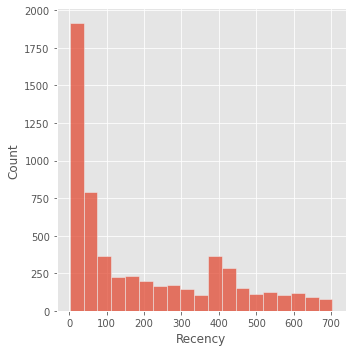

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(rfm['Recency'])
plt.show()

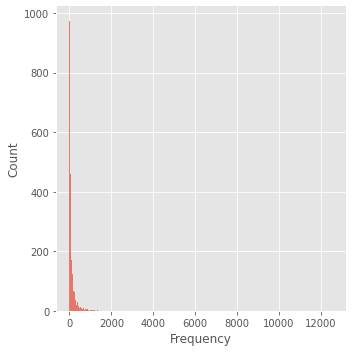

In [215]:
sns.displot(rfm['Frequency'])
plt.show()

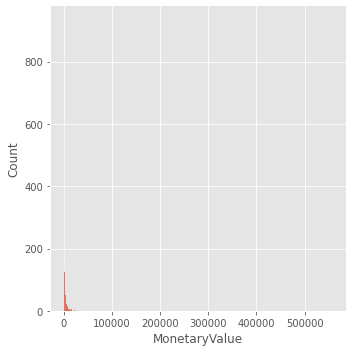

In [216]:
sns.displot(rfm['MonetaryValue'])
plt.show()

Since all values in the rfm_number is positive, I would use the log transformation to make the distributions symmetric.

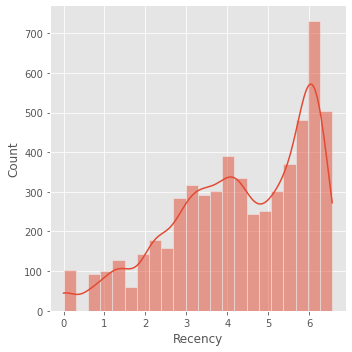

In [217]:
# Import Scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Import numpy
import numpy as np

# Log transform dataframe
rfm_log = rfm_number.apply(np.log, axis=1).round(2)

# Plot the distribution of RFM values
sns.displot(rfm_log['Recency'],kde=True)
plt.show()

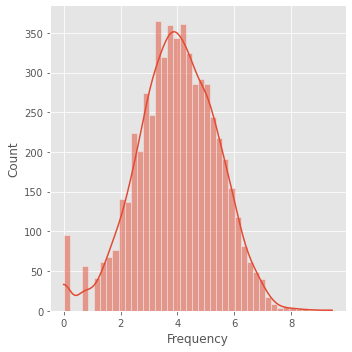

In [218]:
sns.displot(rfm_log['Frequency'],kde=True)
plt.show()

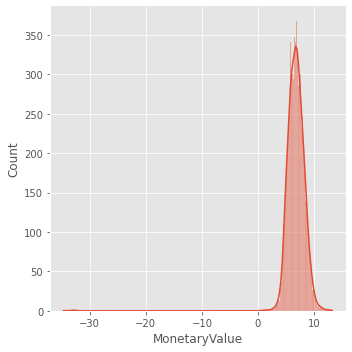

In [219]:
sns.displot(rfm_log['MonetaryValue'],kde=True)
plt.show()

**B. Implementation of K-Means Clustering:**
1. Data pre-processing
2. Choosing a number of clusters
3. Running k-means on pre-processed data
4. Analyzing average RFM values of each cluster

In [220]:
scaler = StandardScaler()

# Replace inf and -inf with nan
rfm_log = rfm_log.replace([np.inf,-np.inf], np.nan)
rfm_log.fillna(0,inplace=True)
scaler.fit(rfm_log)
rfm_normalized = scaler.transform(rfm_log)

**Notes:**
- After log transformation, there are many -inf and inf value in our Monetary Value column. Hence, for StandardScaler to work, I replace those with np.nan and proceed to replace np.nan with 0 (since these -inf and inf mean that the original value is less than 0).

**Methods to define the number of clusters:**
- Visual methods - elbow criterion
- Mathematical methods - silhouette coefficient
- Excperimentation and interpretation

I would implement the Elbow method in this notebook
**Elbow Method:**
- Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center
- Identify an "elbow" in the plot (largest angle). This means that the point represents an "optimal" number of clusters.

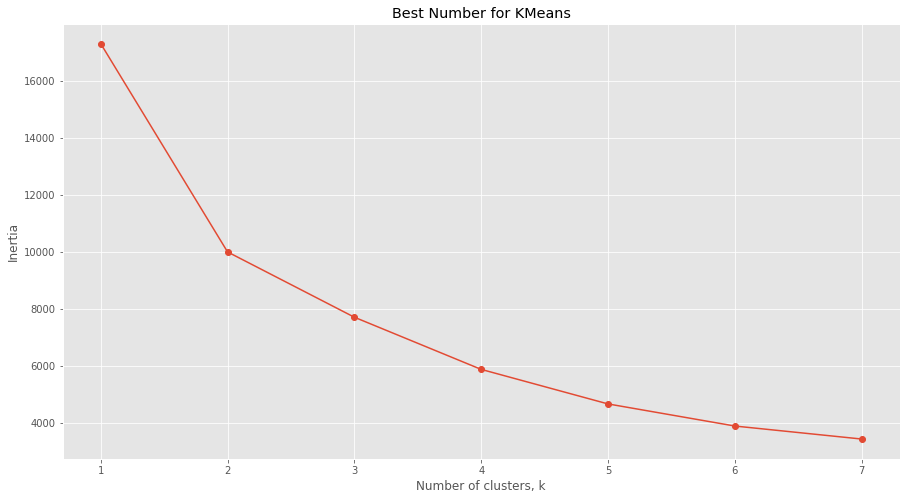

In [221]:
from sklearn.cluster import KMeans

# Initate KMeans range
ks = range(1,8)
inertias = []
for k in ks:
  # Create a KMeans clusters
  kc = KMeans(n_clusters=k, random_state=1)
  kc.fit(rfm_normalized)
  inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

Following the Elbow Method, the optimal number of clusters is selected to be either 3 or 4.

In [224]:
# Clustering
kc = KMeans(n_clusters=3, random_state=1)
kc.fit(rfm_normalized)

# Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

# Calculate average RFM values and sizes for each cluster
rfm_k3 = rfm_number.assign(K_Cluster = cluster_labels)

rfm_k3

,Recency,Frequency,MonetaryValue,K_Cluster
Customer ID,,,,
12347,2,253,5633.32,1
12348,75,51,2019.40,1
12349,19,175,4428.69,1
12350,310,17,334.40,0
12351,375,21,300.93,0
...,...,...,...,...
18283,4,986,2736.65,1
18284,430,29,436.68,0
18285,661,12,427.00,0


In [225]:
# Calculate average RFM values and sizes for each cluster
rfm_k3.groupby('K_Cluster').agg(
    {
        'Recency':'mean',
     'Frequency':'mean',
     'MonetaryValue':['mean','count']
    }
).round(2)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0          303.83     34.35        604.36  3203
1           46.74    266.74       5537.88  2556
2          160.80     55.60          0.00     5

In [226]:
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm_number.index, columns=rfm_number.columns)
rfm_normalized['K_Clusters'] = kc.labels_
rfm_normalized['Grading_Segment'] = rfm['Grading_Segment']
rfm_normalized.head()

,Recency,Frequency,MonetaryValue,K_Clusters,Grading_Segment
Customer ID,,,,,
12347,-2.198626,1.094081,1.030129,1,Gold
12348,-0.004802,-0.031429,0.467830,1,Gold
12349,-0.838818,0.833807,0.899108,1,Gold
12350,0.853388,-0.805218,-0.514828,0,Silver
12351,0.968216,-0.657494,-0.569420,0,Bronze


In [227]:
rfm_normalized.reset_index(inplace=True)
rfm_normalized.head()

,Customer ID,Recency,Frequency,MonetaryValue,K_Clusters,Grading_Segment
0,12347,-2.198626,1.094081,1.030129,1,Gold
1,12348,-0.004802,-0.031429,0.467830,1,Gold
2,12349,-0.838818,0.833807,0.899108,1,Gold
3,12350,0.853388,-0.805218,-0.514828,0,Silver
4,12351,0.968216,-0.657494,-0.569420,0,Bronze


In [228]:
# Melt the data into a long format
rfm_melt = pd.melt(rfm_normalized, id_vars=['Customer ID', 'Grading_Segment', 'K_Clusters'],
                   value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                   var_name='Metric', value_name='Value')
rfm_melt.head()

,Customer ID,Grading_Segment,K_Clusters,Metric,Value
0,12347,Gold,1,Recency,-2.198626
1,12348,Gold,1,Recency,-0.004802
2,12349,Gold,1,Recency,-0.838818
3,12350,Silver,0,Recency,0.853388
4,12351,Bronze,0,Recency,0.968216


**Notes:**
- Pd.cut() works in a similar way as pivoting in Excel. I love it! :)

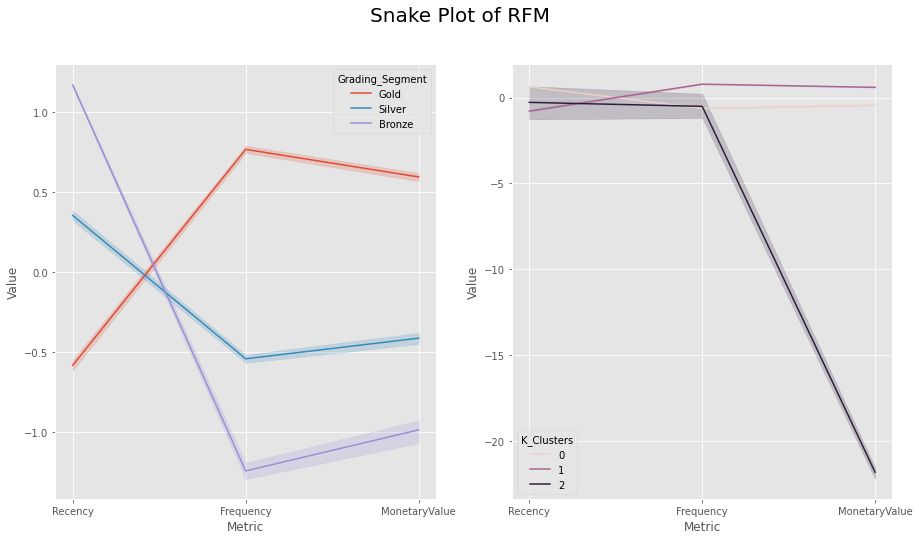

In [229]:
# Create a Snake plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Grading_Segment', data = rfm_melt, ax = ax1)
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Clusters', data = rfm_melt, ax = ax2)

plt.suptitle('Snake Plot of RFM', fontsize=20)
plt.show()

**Notes:**
- It seems like in this case, K-means doesn't give us a picture as accurate as the RFM and custom segment does. I have fun exploring the Customer Segmentation with K-Means and look forward to using it more in the future!
- I have learnt some key steps of a segmentation project, including:


1.  Gather data - updated data with an additional variables
2.  Pre-process the data
3.  Explore data and decide on the number of clusters (elbow method)
4.  Run k-means clustering (after fulfilling all the assumptions)
5.  Analyze & visualize results

References:


*   https://www.kaggle.com/code/olgaluzhetska/online-retail-cohort-analysis-and-other-stories
*   https://www.kaggle.com/code/mahmoudelfahl/cohort-analysis-customer-segmentation-with-rfm/notebook#Implementation-of-K-Means-Clustering
*   Course: Customer Segmentation on DataCamp by Karolis Urbonas







